# Prediction of Apple Quality for Learning

Using the Apple Quality Dataset from kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/code

## Imports

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


## Read Data

In [4]:
df_ini = pd.read_csv("/content/apple_quality.csv")

## Explore Data

In [5]:
df_ini.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [13]:
df_ini.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [6]:
df_ini.shape

(4001, 9)

In [7]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [18]:
df_ini.Quality.unique() # check labels for quality

array(['good', 'bad', nan], dtype=object)

In [19]:
# check for missing values

df_ini.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [22]:
df_ini.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


## Data Cleansing


In [11]:
# Remove A_id column

df_clean = df_ini.drop("A_id", axis=1)

In [14]:
# remove last row
df_clean.drop(df_clean.tail(1).index,inplace=True)

In [20]:
# remove rows with missing values
df_clean.dropna(inplace=True)

In [15]:
# Transform Column Acidity to float

df_clean["Acidity"] = df_clean["Acidity"].astype(float)

## Plots and Visualisations

<ipython-input-25-1d170fe2dd42>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr()


<Figure size 1000x800 with 0 Axes>

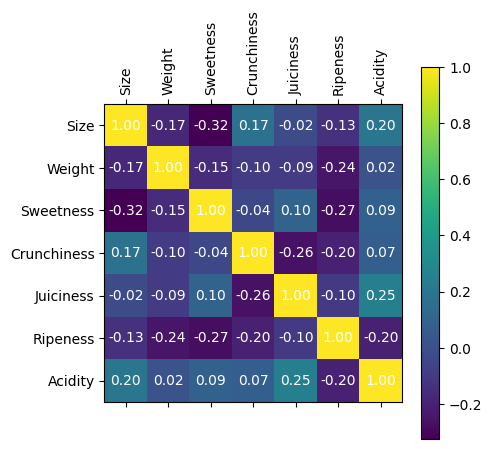

In [25]:
# Create Correlation Matrix

corr_matrix = df_clean.corr()

plt.figure(figsize=(10, 8))

# Plot the matrix
plt.matshow(corr_matrix, cmap="viridis")

# Set ticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation="vertical")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Add color bar
plt.colorbar()

# Add text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="w")

plt.show()

In [27]:
cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness','Acidity']

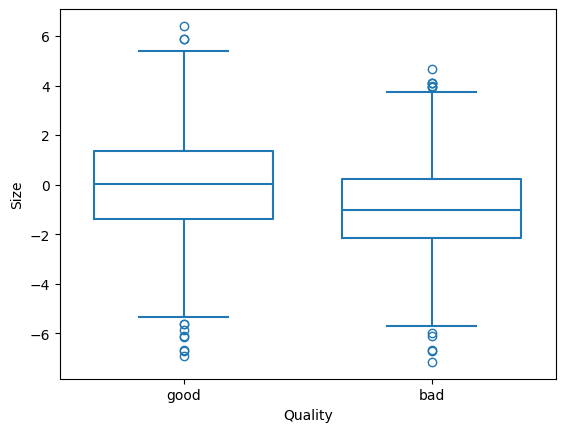

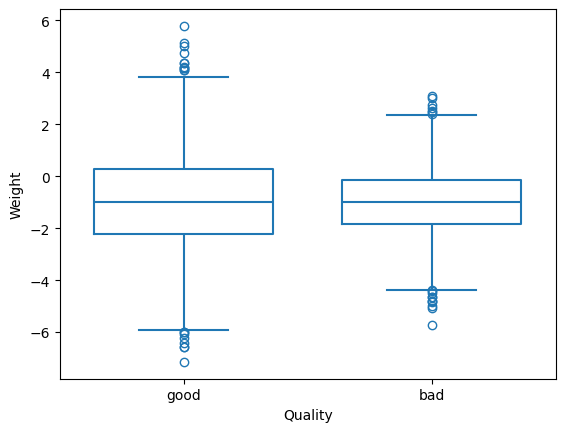

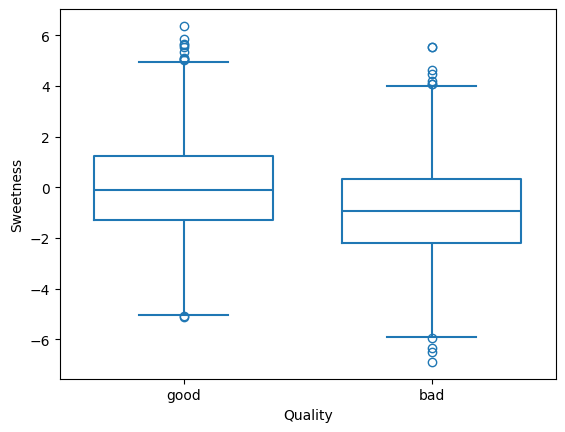

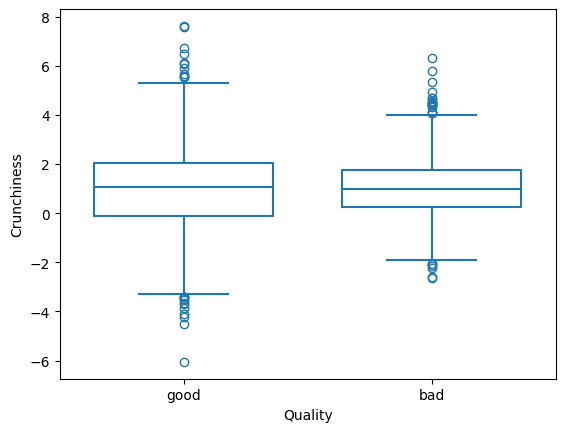

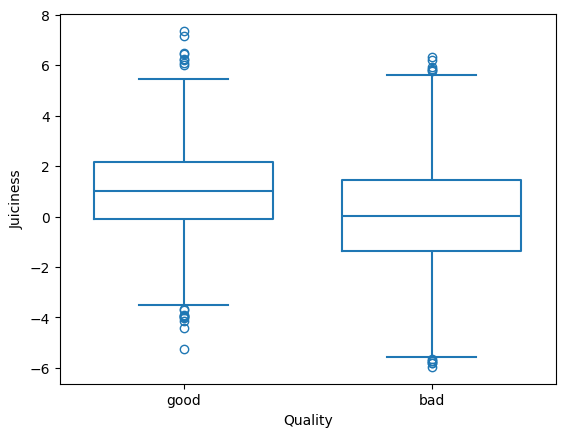

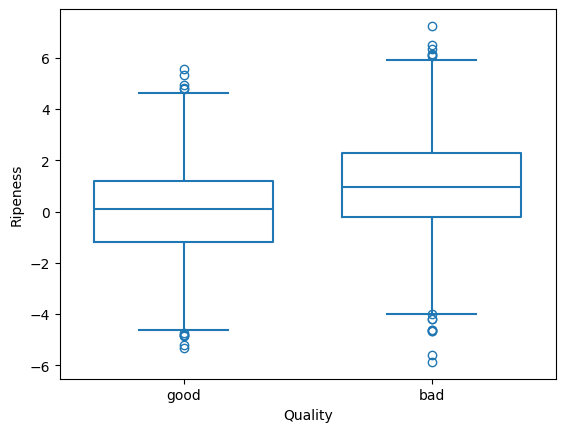

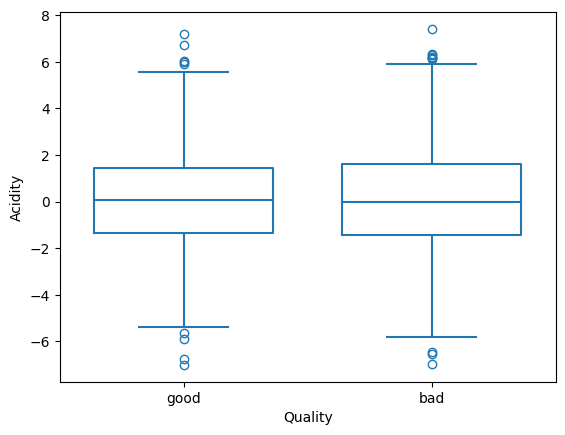

<Figure size 640x480 with 0 Axes>

In [31]:
for col in cols:
  sns.boxplot(data=df_clean, x="Quality", y=col, fill=False, gap=.1)
  plt.figure()

# Model

- Split Test/Training Set
- label quality
- set target column and training columns
- test different models: RandomForest, LinearRegression,
- Evaluate models

In [32]:
# Change labels for Quality
df_clean['Quality'] = df_clean['Quality'].replace({'good': 1, 'bad': -1})

In [59]:
classifiers = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(max_iter=2000, random_state=42),
]

In [60]:
# Select features and samples
X = df_clean.drop("Quality", axis=1)
y = df_clean["Quality"]

In [61]:
# split Data into test, train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
for clf in classifiers:

  # fit data
  clf.fit(X_train, y_train)

  # predict quality
  y_pred = clf.predict(X_test)

  # Model EValuation
  conf_matrix = confusion_matrix(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)

  print(f'Classifier: {clf.__class__.__name__}')
  print(f"Accuracy Score is: {accuracy_score(y_test, y_pred)}")
  print(f"Prediction Score is: {precision_score(y_test, y_pred, average='binary')}")
  print("....")
  print("Confusion Matrix:")
  print(conf_matrix)
  print("...")
  print("CClassification Report:")
  print(classification_rep)

Classifier: RandomForestClassifier
Accuracy Score is: 0.89625
Prediction Score is: 0.8891625615763546
....
Confusion Matrix:
[[356  45]
 [ 38 361]]
...
CClassification Report:
              precision    recall  f1-score   support

          -1       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

Classifier: GradientBoostingClassifier
Accuracy Score is: 0.87
Prediction Score is: 0.8696741854636592
....
Confusion Matrix:
[[349  52]
 [ 52 347]]
...
CClassification Report:
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87       401
           1       0.87      0.87      0.87       399

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87     